In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch import nn

In [4]:
n_samples = 1000

x, y = make_circles(
    n_samples=n_samples,
    noise=0.032,
    random_state=42,
    factor=0.7,
)

x.shape, y.shape

((1000, 2), (1000,))

In [5]:
circles = pd.DataFrame(
    {
        "x1": x[:, 0],
        "x2": x[:, 1],
        "y": y,
    }
)

circles.head(5)

,x1,x2,y
0,0.656504,0.206917,1
1,-0.655278,0.138538,1
2,-0.717627,0.165616,1
3,-0.354693,0.600335,1
4,0.442547,-0.896545,0


In [6]:
circles.y.value_counts()

y
1    500
0    500
Name: count, dtype: int64

In [7]:
circles

,x1,x2,y
0,0.656504,0.206917,1
1,-0.655278,0.138538,1
2,-0.717627,0.165616,1
3,-0.354693,0.600335,1
4,0.442547,-0.896545,0
...,...,...,...
995,0.244558,0.942291,0
996,-0.979327,-0.273952,0
997,-0.117295,-0.713395,1
998,0.669416,-0.770070,0


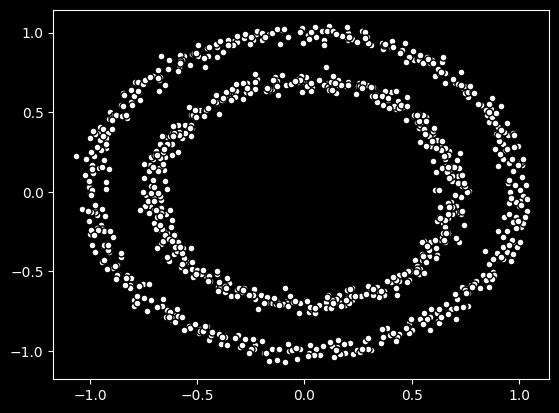

In [8]:
colors = {0: "red", 1: "green", }

plt.scatter(
    x=circles.x1,
    y=circles.x2,
    c="white",
    edgecolors="k",
    s=25,
)

plt.show()

In [9]:
x_samp = x[0]
y_samp = y[0]

In [10]:
x_samp, y_samp

(array([0.65650415, 0.20691709]), np.int64(1))

In [11]:
x_samp.shape, y_samp.shape

((2,), ())

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
x = torch.from_numpy(x).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

In [14]:
x[:4], y[:4]

(tensor([[ 0.6565,  0.2069],
         [-0.6553,  0.1385],
         [-0.7176,  0.1656],
         [-0.3547,  0.6003]], device='cuda:0'),
 tensor([1., 1., 1., 1.], device='cuda:0'))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
)

In [16]:
def plot_circle(
        train_data=x_train.to("cpu"),
        test_data=x_test.to("cpu"),
        predictions=None,
):
    plt.figure(figsize=(10, 10))
    plt.scatter(
        x=train_data[:, 0],
        y=train_data[:, 1],
        c="white",
        edgecolors="k",
        s=10,
    )
    plt.scatter(
        x=test_data[:, 0],
        y=test_data[:, 1],
        c="red",
        edgecolors="k",
        s=10,
    )

    if predictions is not None:
        plt.scatter(
            x=predictions[:, 0],
            y=predictions[:, 1],
            c="green",
            edgecolors="k",
            s=4,
        )

    plt.title("Title")
    plt.show()

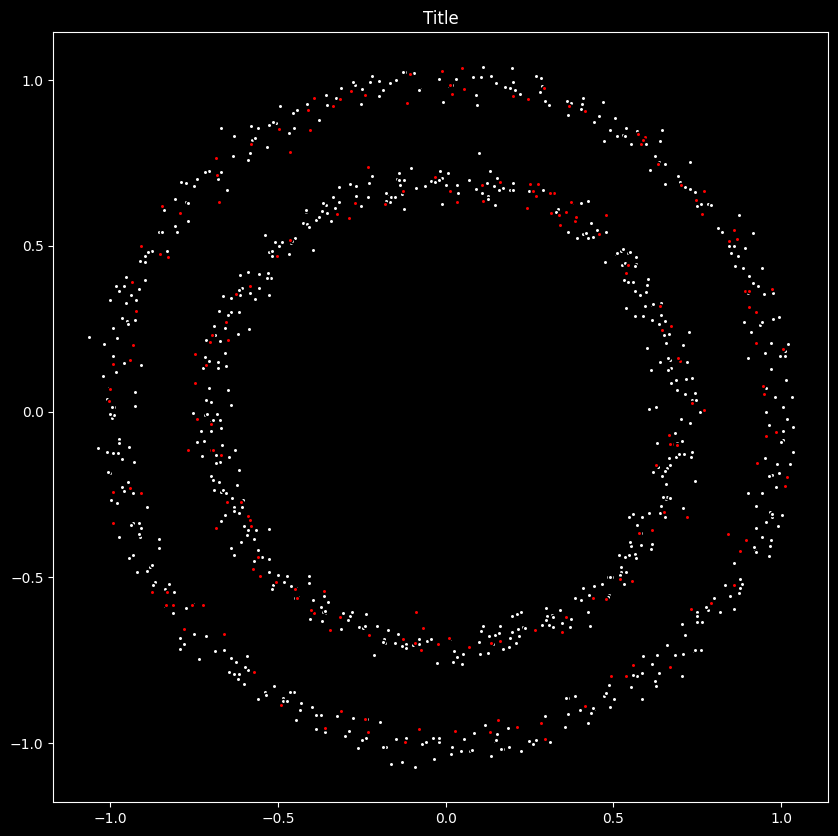

In [17]:
plot_circle()

In [18]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 6)
        self.layer2 = nn.Linear(6, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer2(self.layer1(x))


model = CircleModel().to(device)
model

CircleModel(
  (layer1): Linear(in_features=2, out_features=6, bias=True)
  (layer2): Linear(in_features=6, out_features=1, bias=True)
)

In [19]:
untrained_preds = model(x_test)
untrained_preds

tensor([[-0.0072],
        [-0.2567],
        [ 0.3343],
        [-0.1161],
        [-0.0265],
        [-0.1619],
        [-0.5572],
        [-0.5415],
        [ 0.3540],
        [-0.2761],
        [ 0.0148],
        [-0.0835],
        [-0.5685],
        [ 0.3422],
        [ 0.4689],
        [-0.3193],
        [-0.3214],
        [ 0.1340],
        [ 0.1074],
        [ 0.2624],
        [-0.2609],
        [-0.4461],
        [ 0.1676],
        [ 0.2333],
        [-0.4978],
        [-0.5290],
        [ 0.3189],
        [-0.3030],
        [ 0.5088],
        [ 0.2808],
        [-0.3741],
        [-0.4886],
        [-0.0295],
        [ 0.1166],
        [ 0.0141],
        [-0.2335],
        [-0.0855],
        [ 0.3508],
        [ 0.1866],
        [ 0.3206],
        [ 0.1933],
        [ 0.3400],
        [-0.3150],
        [-0.0054],
        [-0.0420],
        [-0.2611],
        [-0.1024],
        [-0.2588],
        [-0.1853],
        [-0.1121],
        [-0.0942],
        [-0.0583],
        [-0.

In [20]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [21]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_true) * 100
    return acc

In [22]:
y_logits = model(x_test)[:10]
y_logits

tensor([[-0.0072],
        [-0.2567],
        [ 0.3343],
        [-0.1161],
        [-0.0265],
        [-0.1619],
        [-0.5572],
        [-0.5415],
        [ 0.3540],
        [-0.2761]], device='cuda:0', grad_fn=<SliceBackward0>)

In [23]:
y_pred_porbs = torch.sigmoid(y_logits)
y_pred_porbs

tensor([[0.4982],
        [0.4362],
        [0.5828],
        [0.4710],
        [0.4934],
        [0.4596],
        [0.3642],
        [0.3678],
        [0.5876],
        [0.4314]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [24]:
train_preds = torch.round(y_pred_porbs)
train_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [25]:
torch.manual_seed(42)

epochs = 300
for epoch in range(epochs):
    model.train()

    train_logits = model(x_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_preds)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(x_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | TrainLoss: {train_loss:.5f}, TrainAccuracy: {train_acc:.2f}% | TestLoss: {test_loss:.5f}, TestAccuracy: {test_acc:.2f}%")

Epoch: 0 | TrainLoss: 0.70837, TrainAccuracy: 49.25% | TestLoss: 0.69539, TestAccuracy: 51.50%
Epoch: 10 | TrainLoss: 0.69416, TrainAccuracy: 50.75% | TestLoss: 0.69375, TestAccuracy: 53.00%
Epoch: 20 | TrainLoss: 0.69327, TrainAccuracy: 51.12% | TestLoss: 0.69770, TestAccuracy: 45.50%
Epoch: 30 | TrainLoss: 0.69326, TrainAccuracy: 50.50% | TestLoss: 0.69560, TestAccuracy: 48.50%
Epoch: 40 | TrainLoss: 0.69298, TrainAccuracy: 51.12% | TestLoss: 0.69467, TestAccuracy: 45.50%
Epoch: 50 | TrainLoss: 0.69298, TrainAccuracy: 50.75% | TestLoss: 0.69498, TestAccuracy: 45.00%
Epoch: 60 | TrainLoss: 0.69297, TrainAccuracy: 50.75% | TestLoss: 0.69466, TestAccuracy: 47.00%
Epoch: 70 | TrainLoss: 0.69296, TrainAccuracy: 51.38% | TestLoss: 0.69485, TestAccuracy: 45.50%
Epoch: 80 | TrainLoss: 0.69296, TrainAccuracy: 51.25% | TestLoss: 0.69503, TestAccuracy: 45.50%
Epoch: 90 | TrainLoss: 0.69296, TrainAccuracy: 51.50% | TestLoss: 0.69485, TestAccuracy: 45.50%
Epoch: 100 | TrainLoss: 0.69296, TrainAcc

In [26]:
def plot_decision_boundry(model_to_plot: nn.Module, x_values: torch.Tensor, y_values: torch.Tensor):
    model_to_plot.to("cpu")
    x_values, y_values = x_values.to("cpu"), y_values.to("cpu")

    x_min, x_max, = x_values[:, 0].min() - 0.1, x_values[:, 0].max() + 0.1
    y_min, y_max, = x_values[:, 1].min() - 0.1, x_values[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    x_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    model_to_plot.eval()
    with torch.inference_mode():
        y_logits_ = model_to_plot(x_to_pred_on)

    if len(torch.unique(y_values)) > 2:
        y_pred = torch.softmax(y_logits_, dim=1).argmax(dim=1)
    else:
        y_pred = torch.round(torch.sigmoid(y_logits_))

    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x_values[:, 0], x_values[:, 1], c=y_values, s=40, cmap=plt.cm.RdYlBu, edgecolors="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


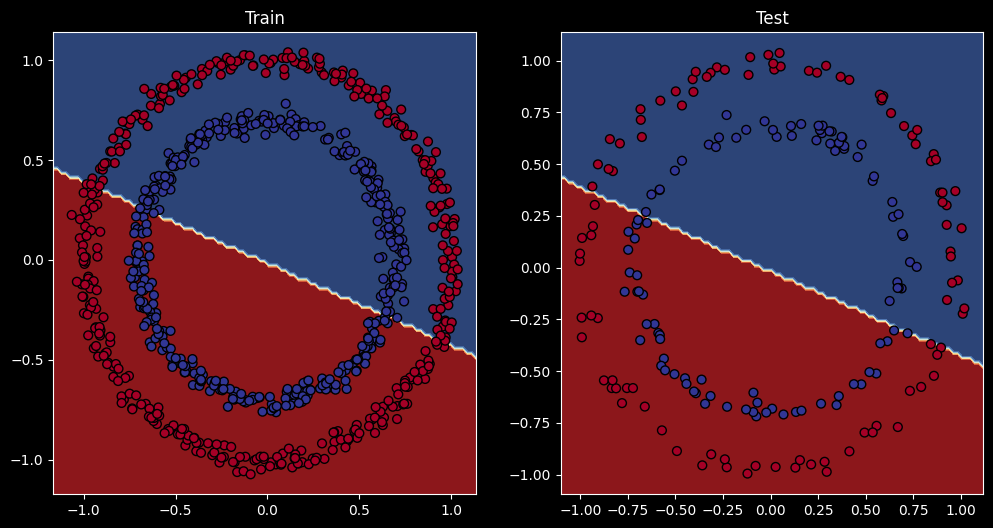

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundry(model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundry(model, x_test, y_test)

In [28]:
class CircleModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer3(self.layer2(self.layer1(x)))


model2 = CircleModel2().to(device)
model2

CircleModel2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
loss_fn2 = nn.BCEWithLogitsLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

In [30]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model2.train()

    train_logits = model2(x_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_fn2(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_preds)

    optimizer2.zero_grad()
    train_loss.backward()
    optimizer2.step()

    model2.eval()
    with torch.inference_mode():
        test_logits = model2(x_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn2(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | TrainLoss: {train_loss:.5f}, TrainAccuracy: {train_acc:.2f}% | TestLoss: {test_loss:.5f}, TestAccuracy: {test_acc:.2f}%")

Epoch: 0 | TrainLoss: 0.69389, TrainAccuracy: 51.75% | TestLoss: 0.69433, TestAccuracy: 50.00%
Epoch: 10 | TrainLoss: 0.69301, TrainAccuracy: 48.62% | TestLoss: 0.69454, TestAccuracy: 46.00%
Epoch: 20 | TrainLoss: 0.69298, TrainAccuracy: 49.62% | TestLoss: 0.69501, TestAccuracy: 46.50%
Epoch: 30 | TrainLoss: 0.69297, TrainAccuracy: 50.50% | TestLoss: 0.69489, TestAccuracy: 46.00%
Epoch: 40 | TrainLoss: 0.69296, TrainAccuracy: 50.88% | TestLoss: 0.69483, TestAccuracy: 46.00%
Epoch: 50 | TrainLoss: 0.69296, TrainAccuracy: 51.00% | TestLoss: 0.69496, TestAccuracy: 45.50%
Epoch: 60 | TrainLoss: 0.69296, TrainAccuracy: 51.00% | TestLoss: 0.69483, TestAccuracy: 46.00%
Epoch: 70 | TrainLoss: 0.69296, TrainAccuracy: 51.38% | TestLoss: 0.69490, TestAccuracy: 46.00%
Epoch: 80 | TrainLoss: 0.69296, TrainAccuracy: 51.12% | TestLoss: 0.69487, TestAccuracy: 46.00%
Epoch: 90 | TrainLoss: 0.69296, TrainAccuracy: 51.62% | TestLoss: 0.69488, TestAccuracy: 46.00%
Epoch: 100 | TrainLoss: 0.69296, TrainAcc

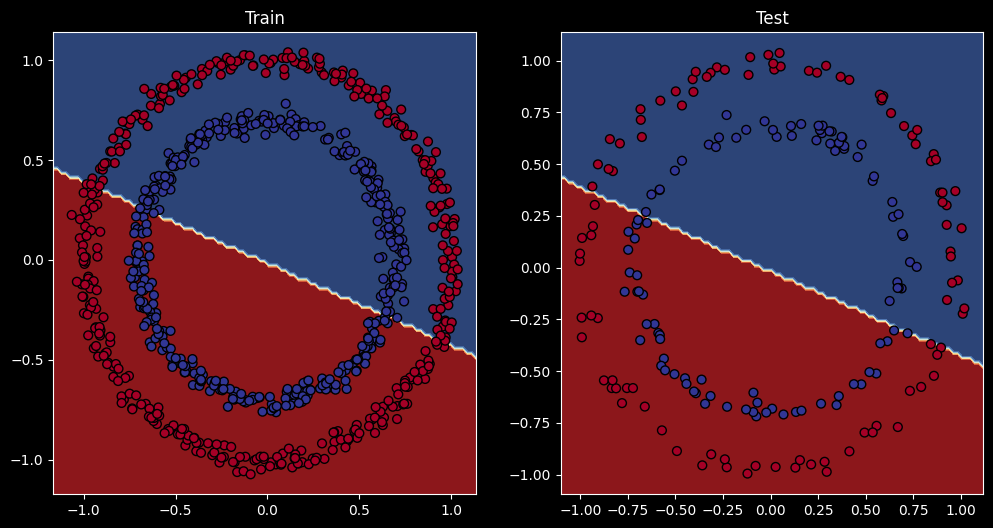

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundry(model2, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundry(model2, x_test, y_test)

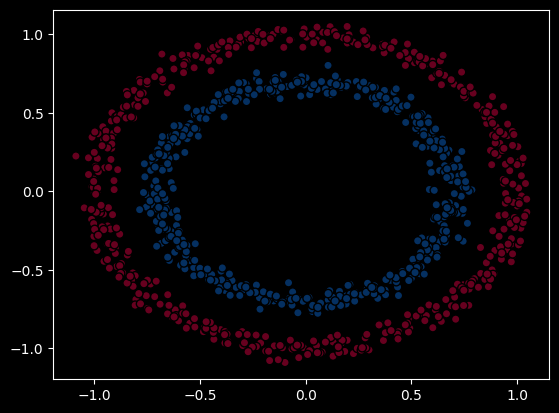

In [32]:
n_samples = 1000

x, y = make_circles(
    n_samples=n_samples,
    factor=0.7,
    noise=0.04,
    random_state=42,
)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors="k")

In [33]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
class CircleModelWithActivation(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)
        self.activator = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer3(self.layer2(self.activator(self.layer1(x))))


modelWithActivation = CircleModelWithActivation().to(device)
modelWithActivation


CircleModelWithActivation(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (activator): ReLU()
)

In [36]:
loss_fn3 = nn.BCEWithLogitsLoss()
optimizer3 = torch.optim.Adam(modelWithActivation.parameters(), lr=0.01)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [38]:
torch.manual_seed(42)
epochs = 1000
x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    modelWithActivation.train()

    train_logits = modelWithActivation(x_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_fn3(train_logits, y_train)
    train_acc = accuracy_fn(y_train, train_preds)

    optimizer3.zero_grad()
    train_loss.backward()
    optimizer3.step()

    modelWithActivation.eval()
    with torch.inference_mode():
        test_logits = modelWithActivation(x_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn3(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | TrainLoss: {train_loss:.5f}, TrainAccuracy: {train_acc:.2f}% | TestLoss: {test_loss:.5f}, TestAccuracy: {test_acc:.2f}%")


Epoch: 0 | TrainLoss: 0.69364, TrainAccuracy: 50.00% | TestLoss: 0.69082, TestAccuracy: 50.00%
Epoch: 10 | TrainLoss: 0.67281, TrainAccuracy: 54.62% | TestLoss: 0.66859, TestAccuracy: 55.50%
Epoch: 20 | TrainLoss: 0.64241, TrainAccuracy: 60.12% | TestLoss: 0.63326, TestAccuracy: 59.50%
Epoch: 30 | TrainLoss: 0.58857, TrainAccuracy: 80.12% | TestLoss: 0.57571, TestAccuracy: 79.00%
Epoch: 40 | TrainLoss: 0.49959, TrainAccuracy: 85.88% | TestLoss: 0.48594, TestAccuracy: 87.00%
Epoch: 50 | TrainLoss: 0.37142, TrainAccuracy: 91.88% | TestLoss: 0.36714, TestAccuracy: 92.50%
Epoch: 60 | TrainLoss: 0.23990, TrainAccuracy: 95.50% | TestLoss: 0.25174, TestAccuracy: 95.00%
Epoch: 70 | TrainLoss: 0.13704, TrainAccuracy: 97.75% | TestLoss: 0.15625, TestAccuracy: 98.00%
Epoch: 80 | TrainLoss: 0.07038, TrainAccuracy: 99.75% | TestLoss: 0.09240, TestAccuracy: 98.50%
Epoch: 90 | TrainLoss: 0.03519, TrainAccuracy: 100.00% | TestLoss: 0.04827, TestAccuracy: 100.00%
Epoch: 100 | TrainLoss: 0.02061, TrainA

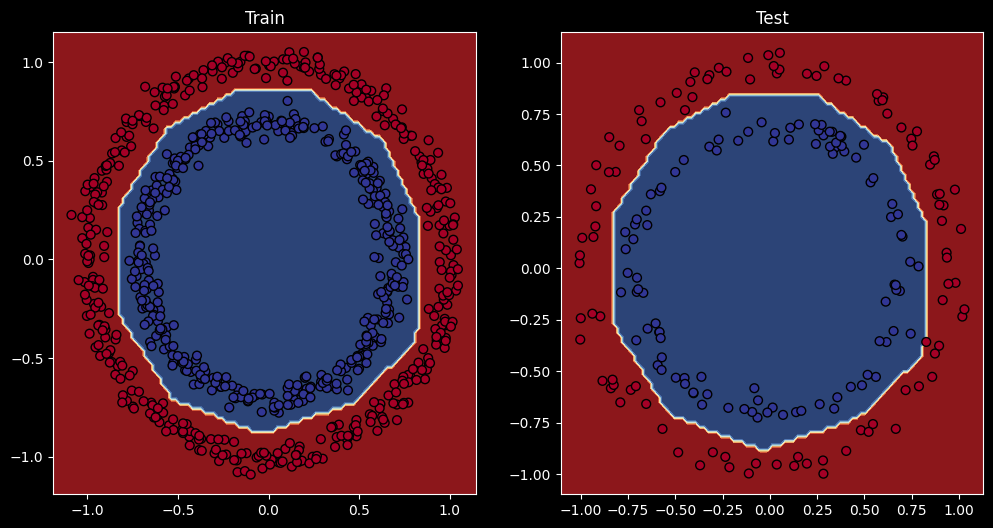

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundry(modelWithActivation, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundry(modelWithActivation, x_test, y_test)